In [53]:
# %load Import.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from pylab import mpl 

#内置画图；显示中文字体，负号；使用R语言画图包ggplot
%matplotlib inline
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')


In [1]:
%%HTML
<button onclick="$('.input, .output_stderr, .output_error, .output_result').toggle();">Toggle Code</button>
#button onclick[1]:.prompt, 去掉前面的编号

In [3]:
#添加表头、分隔符
columns = ['user_id','date','amount','price']
df = pd.read_table("CDNOW_master.txt", names = columns, sep='\s+')

##  数据概览与清洗

In [4]:
df.head()

,user_id,date,amount,price
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [5]:
df[['amount','price']].describe()

,amount,price
count,69659.000000,69659.000000
mean,2.410040,35.893648
std,2.333924,36.281942
min,1.000000,0.000000
25%,1.000000,14.490000
50%,2.000000,25.980000
75%,3.000000,43.700000
max,99.000000,1286.010000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id    69659 non-null int64
date       69659 non-null int64
amount     69659 non-null int64
price      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [55]:
#标准化时间格式
df['date'] = pd.to_datetime(df.date, format='%Y%m%d')
df['month'] = df.date.values.astype('datetime64[M]')

In [56]:
df.head()

,user_id,date,amount,price,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


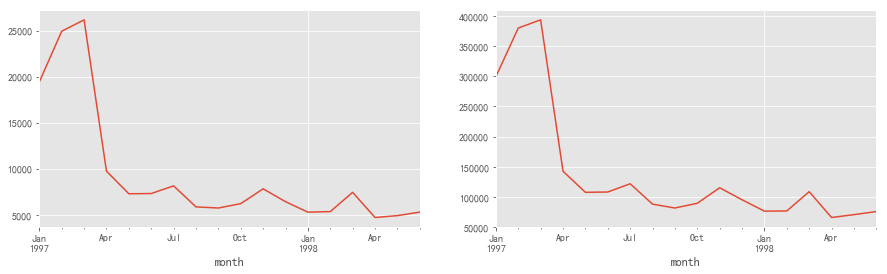

In [57]:
#按月查看销量以及金额
#数据粒度为用户
user_grouped = df.groupby('user_id').sum()
plt.figure(figsize=(15,4))
plt.subplot(121)
ax1 = df.groupby('month').amount.sum().plot()

plt.subplot(122)
ax2 = df.groupby('month').price.sum().plot()
                                                #如何设置双纵坐标，且设置副轴纵坐标范围？

## 假设定义与检验

**假设1：初期用户数据异常**

**假设2：促销活动** （只有销售数据，无法判断）

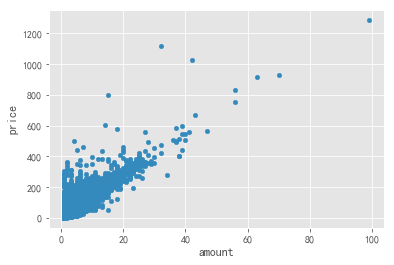

In [14]:
#查看每笔订单散点图，说明无异常值
df.plot.scatter(x='amount', y='price')

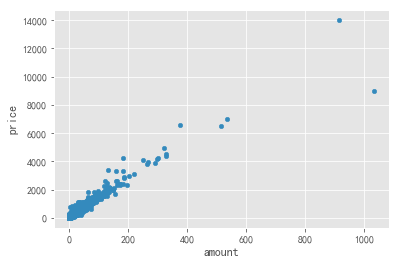

In [15]:
#查看每位用户散点图，说明并无异常
user_grouped.plot.scatter(x='amount', y='price')

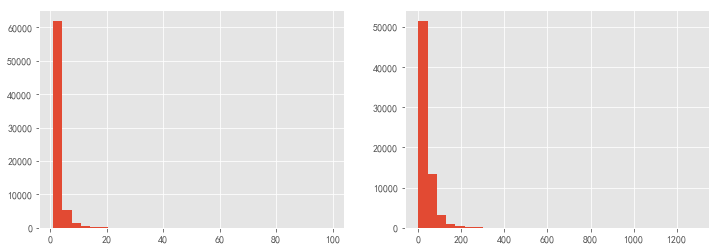

In [16]:
#上述数据的直方图，大部分用户消费能力不高，消费类数据典型的二八分布
plt.figure(figsize=(12,4))
plt.subplot(121)
df.amount.hist(bins=30)

plt.subplot(122)
df.price.hist(bins=30)

In [17]:
#用户首次购买时间点
df.groupby('user_id').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [18]:
#用户最后一次购买时间点
df.groupby('user_id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

>**原因解析：绝大多数用户集中在前三个月消费，可能造成了上述数据异常**

>*(上述消费数据定义为新客数据*)

## 用户复购率和回购率

In [60]:
#以用户为粒度生成数据透视
df_pivoted = df.pivot_table(index='user_id', columns='month', values='date',aggfunc='count').fillna(0)

#时间格式标准化
columns_month = df.month.sort_values().astype('str').unique()
df_pivoted.columns = columns_month
df_pivoted.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#判断单次购买（0）、复购（1），未购买（NaN）
pivoted_trans = df_pivoted.applymap(lambda x:1 if x>1 else 0 if x==1 else np.NaN)

In [22]:
pivoted_trans.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


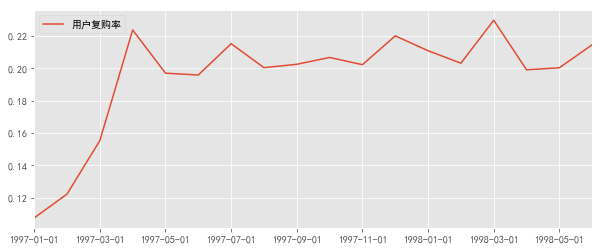

In [23]:
#.sum()与.count()均忽略NaN，.count()对0也计数
(pivoted_trans.sum()/pivoted_trans.count()).plot(figsize=(10,4),label=u'用户复购率')
plt.legend()

>**新客复购率在6%，老客复购率在20%**

In [24]:
#以用户为粒度生成数据透视，value为价格仅作为练习用
df_pivoted = df.pivot_table(index='user_id', columns='month', values='price',aggfunc='mean').fillna(0)

#时间格式标准化
columns_month = df.month.sort_values().astype('str').unique()
df_pivoted.columns = columns_month
df_pivoted.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [25]:
pivoted_purchase = df_pivoted.applymap(lambda x:1 if x>0 else 0)

In [26]:
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [27]:
#判断连续购买（1），单次购买（0），未购买（NaN）
def repurchase(data):
    status = []
    for i in range(17):
        if data[i]==1:
            if data[i+1]==1:
                status.append(1)
            if data[i+1]==0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status

pivoted_purchase_trans = pivoted_purchase.apply(repurchase, axis=1)
pivoted_purchase_trans.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


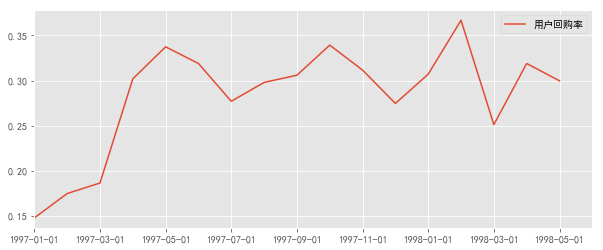

In [28]:
(pivoted_purchase_trans.sum()/pivoted_purchase_trans.count()).plot(figsize=(10,4),label=u'用户回购率')
plt.legend()

>**新客连续回购率在15%，老客连续回购率在30%**

>**老客的忠诚度较好**

## 用户分层

### **定义用户类别**

- 新用户：首次消费
    
- 活跃用户（老客）：多次消费
    
- 不活跃用户：当前窗口期无消费
    
- 回流用户：上一个窗口期无消费老客

In [62]:
#需要判断当前值、当前状态，上个值状态
def user_status(data):
    status = []
    for i in range(18):
        if data[i] == False:
            if len(status) !=False:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unact')
            else:
                status.append('unreg')
        else:
            if len(status) == False:
                status.append('new')
            else:
                if status[i-1] == 'unact':
                    status.append('rec')
                else:
                    if status[i-1] == 'unreg':
                        status.append('new')
                    else:
                        status.append('act')
    return status

purchase_user_status = pivoted_purchase.apply(lambda x:user_status(x), axis=1)
purchase_user_status.head()

                                                                                #可做函数封装，做ETL增量

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unact,unact,unact,unact,unact,unact,unact,unact,unact,unact,unact,unact,unact,unact,unact,unact,unact
2,new,unact,unact,unact,unact,unact,unact,unact,unact,unact,unact,unact,unact,unact,unact,unact,unact,unact
3,new,unact,rec,act,unact,unact,unact,unact,unact,unact,rec,unact,unact,unact,unact,unact,rec,unact
4,new,unact,unact,unact,unact,unact,unact,rec,unact,unact,unact,rec,unact,unact,unact,unact,unact,unact
5,new,act,unact,rec,act,act,act,unact,rec,unact,unact,rec,act,unact,unact,unact,unact,unact


In [30]:
#不统计unregisted
purchase_user_status_counts = purchase_user_status.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_user_status_counts

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
act,NaN,1155.0,1680,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624,632.0,512.0,472.0,569.0,517.0,458.0,446.0
new,7814.0,8455.0,7231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rec,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1402,1232.0,1025.0,1079.0,1489.0,919.0,1030.0,1060.0
unact,NaN,6659.0,13994,20678.0,21286.0,21161.0,21320.0,21728.0,21761.0,21661.0,21474,21638.0,21965.0,21951.0,21444.0,22066.0,22014.0,21996.0


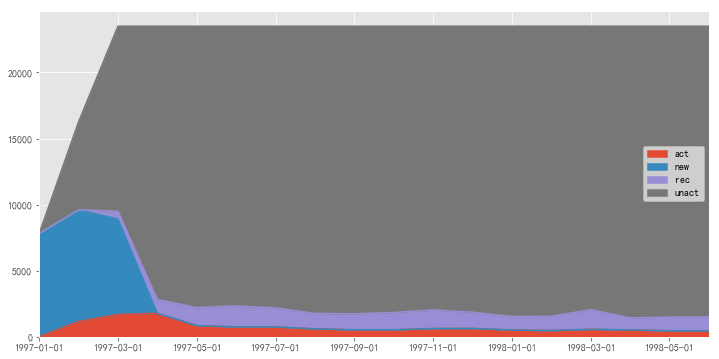

In [64]:
#累计图
purchase_user_status_counts.fillna(0).T.plot.area(figsize=(12,6))

> ***消费用户占比（活跃用户+回流用户）稳定***

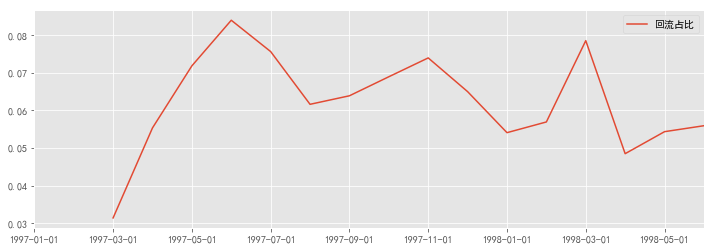

In [32]:
recurring_rate = purchase_user_status_counts.apply(lambda x:x/x.sum(), axis=1)
recurring_rate.loc['rec'].plot(figsize=(12,4), label='回流占比')
plt.legend()

> **用户回流占比在5%～8%，有下降趋势

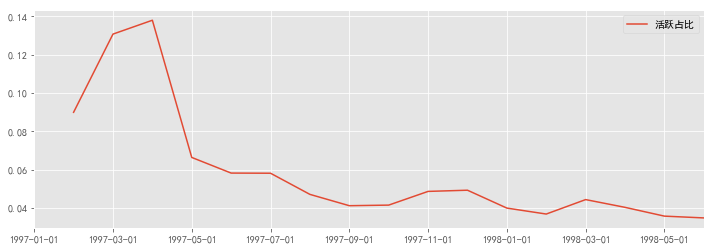

In [33]:
recurring_rate.loc['act'].plot(figsize=(12,4), label='活跃占比')
plt.legend()

> **活跃用户的下降趋势更明显，占比在3%～5%间。


> **在后期的消费用户中，60%是回流用户，40%是活跃用户。这里用户活跃可以看作连续消费用户，质量在一定程度上高于回流用户。**

## 用户质量度

**假设1：消费贡献呈现二八分布，高消费用户约占二成**

In [65]:
#按每位用户消费值排序，计算累加金额
user_total = df.groupby('user_id').price.sum().sort_values().reset_index()
user_total_cumsum = user_total.cumsum()
user_total_cumsum.tail()

,user_id,price
23565,277735273.0,2463822.60
23566,277754612.0,2470375.30
23567,277762595.0,2477348.37
23568,277776643.0,2486324.70
23569,277784235.0,2500315.63


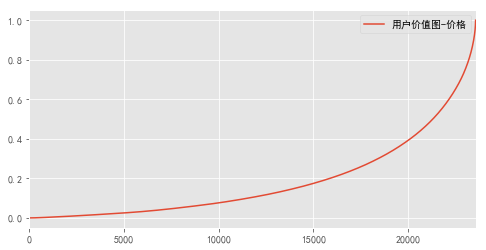

In [35]:
cumsum_max = user_total_cumsum.max()
user_value_rate = user_total_cumsum.apply(lambda x:x.price/cumsum_max, axis=1)
user_value_rate.price.plot(figsize=(8,4), label='用户价值图-价格')
plt.legend()

> 前20000个用户贡献了40%的消费，后面4000位用户贡献了60%

In [66]:
#按每位用户消费值排序，计算累加购买次数
user_total_cumsum = df.groupby('user_id').amount.count().sort_values().reset_index().cumsum()
user_total_cumsum.tail()

,user_id,amount
23565,277732551,68949
23566,277754612,69092
23567,277762595,69241
23568,277770187,69442
23569,277784235,69659


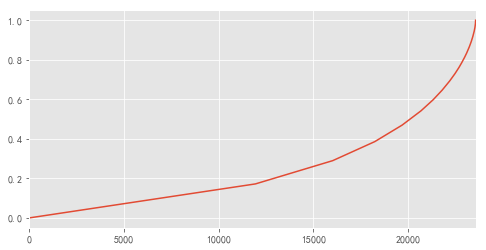

In [37]:
_max = user_total_cumsum.max()
user_value_rate = user_total_cumsum.apply(lambda x:x.amount/_max, axis=1)
user_value_rate.amount.plot(figsize=(8,4), label='用户价值图-数量')

> 前20000个用户贡献了45%的销量，高消费用户贡献了55%的销量。

## 用户生命周期


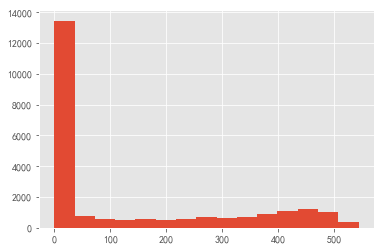

In [38]:
#定义第一次消费至最后一次消费为整个用户生命周期
user_lifecycle = df.groupby('user_id').date.max()-df.groupby('user_id').date.min()

#时间数据数字化
(user_lifecycle/np.timedelta64(1,'D')).hist(bins=15)


> 所有用户的平均生命周期是134天

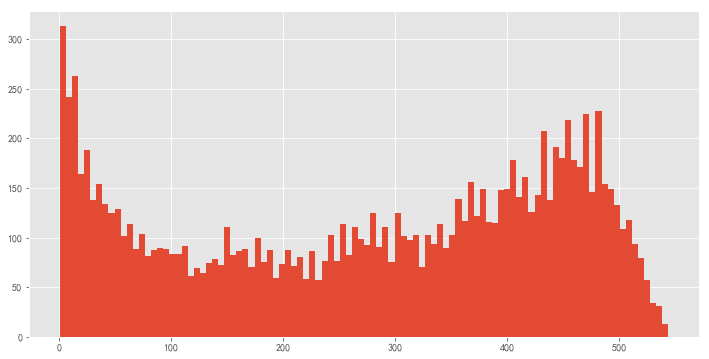

In [39]:
#去掉单次购买
user_lifecycle_sub = user_lifecycle.reset_index().date/np.timedelta64(1,'D')
user_lifecycle_sub[user_lifecycle_sub>0].hist(bins=100, figsize=(12,6))

> 消费两次以上的用户生命周期是276天

> **从策略看，用户首次消费后应该花费更多的引导其进行多次消费，提供生命周期**

## 用户留存率

- 用户在第一次消费后，有多少比率进行第二次消费

In [40]:
copy_ = df[['user_id', 'amount', 'price', 'date']]
date_min = copy_.groupby('user_id').date.min()

#merge类似join
user_retention = pd.merge(left=copy_, right=date_min.reset_index(),
                          how='inner', on='user_id',
                          suffixes=('','_min'))
user_retention.head()

,user_id,amount,price,date,date_min
0,1,1,11.77,1997-01-01,1997-01-01
1,2,1,12.00,1997-01-12,1997-01-12
2,2,5,77.00,1997-01-12,1997-01-12
3,3,2,20.76,1997-01-02,1997-01-02
4,3,2,20.76,1997-03-30,1997-01-02


In [41]:
user_retention['date_diff'] = user_retention.date - user_retention.date_min
user_retention.head()

,user_id,amount,price,date,date_min,date_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days
1,2,1,12.00,1997-01-12,1997-01-12,0 days
2,2,5,77.00,1997-01-12,1997-01-12,0 days
3,3,2,20.76,1997-01-02,1997-01-02,0 days
4,3,2,20.76,1997-03-30,1997-01-02,87 days


In [42]:
user_retention['date_diff_int'] = user_retention.date_diff.apply(lambda x:x/np.timedelta64(1,'D'))

In [43]:
#cut分桶
user_retention['date_diff_bins'] = pd.cut(user_retention.date_diff_int,
                                          bins=[0,3,7,15,30,60,90,180,365])

In [44]:
user_retention.head()

,user_id,amount,price,date,date_min,date_diff,date_diff_int,date_diff_bins
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0,NaN
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0,NaN
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0,NaN
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0,NaN
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0,"(60, 90]"


In [45]:
pivoted_retention = user_retention.pivot_table(index='user_id', columns='date_diff_bins',
                                               values='price', aggfunc=sum)


In [46]:
#各时段内平均消费总额
pivoted_retention.mean()

date_diff_bins
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

In [47]:
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x:1 if x>0 else 0)

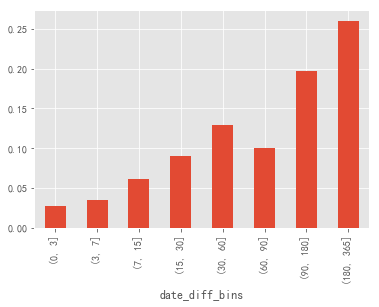

In [48]:
(pivoted_retention_trans.sum()/pivoted_retention_trans.count()).plot.bar()

> - 2.5%的用户在第一次消费的次日至3天内有过消费，3%的用户在3～7天内有过消费。

> - 20%的用户在第一次消费后的三个月到半年之间有过购买，27%的用户在半年后至1年内有过购买。

>**从运营角度看，应该注重用户忠诚度的培养，在一定时间内召回用户购买。**

In [49]:
def diff(group):
    d = group.date_diff_int - group.date_diff_int.shift(-1)
    return d

last_diff = user_retention.groupby('user_id').apply(diff)
last_diff.head()

user_id   
1        0     NaN
2        1     0.0
         2     NaN
3        3   -87.0
         4    -3.0
Name: date_diff_int, dtype: float64

In [67]:
#用户的平均消费间隔时间
last_diff.mean()

-68.973768144242655

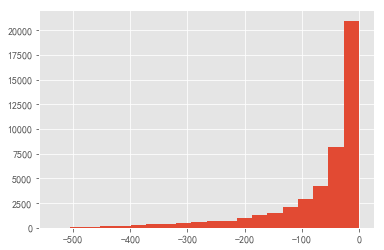

In [51]:
last_diff.hist(bins=20)

> 典型的长尾分布，大部分用户的消费间隔确实比较短。

> **综上，想要召回用户，在60天左右的消费间隔是比较好的。**

# THE END